# SIGNATURE RECOGNITION 

Import necessary libraries:

In [67]:
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

%matplotlib inline

To save frames marked as `TYPE_1` if `1` is pressed, and frames marked as `TYPE_2` if `2` is pressed.

_It's recommendable take at least 100 pictures of each type!_

In [68]:
class_names = ['MENSAH', 'VICTORIA', 'DHEEWYN', 'QUAVO']

In [69]:
# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []
raw_frames_type_3 = []
raw_frames_type_4 = []

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        # save the frame
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
    elif key & 0xFF == ord("2"):
        # save the frame
        raw_frames_type_2.append(frame)
        print('2 key pressed - Saved TYPE_2 frame')
    elif key & 0xFF == ord("3"):
        # save the frame
        raw_frames_type_3.append(frame)
        print('3 key pressed - Saved TYPE_3 frame')
    elif key & 0xFF == ord("4"):
        # save the frame
        raw_frames_type_4.append(frame)
        print('4 key pressed - Saved TYPE_4 frame')

camera.release()
cv2.destroyAllWindows()

# Now crop ROI from the frames, resize it to `399*399` and persist them to
- `data/images_type_1`
- `data/images_type_2`
- `data/images_type_3`
- `data/images_type_4`

In [70]:
save_width = 399
save_height = 399

In [71]:
for i in range(1, 5):
    name = './data/images_type_{}'.format(i)
    os.makedirs(name, exist_ok=True)

In [72]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_1/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_2/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_3):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_3/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_4):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_4/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

Take a look at the folders to see if images were saved correctly.

Now let's load again the images:

In [73]:
width = 96
height = 96

In [74]:
import os
import random
from glob import glob
from keras import preprocessing

In [75]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.png')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [76]:
images_type_1 = load_images('./data/images_type_1')
images_type_2 = load_images('./data/images_type_2')
images_type_3 = load_images('./data/images_type_3')
images_type_4 = load_images('./data/images_type_4')

5 random type_1 images:

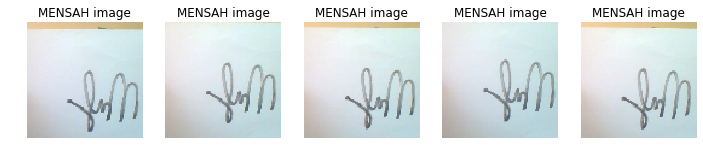

In [77]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

5 random type_2 images:

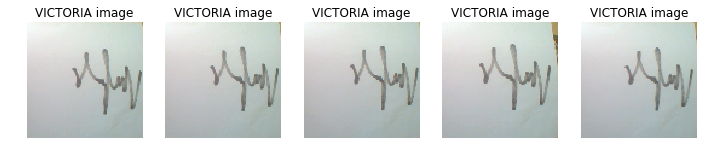

In [78]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# show the plot
plt.show()

### Prepare images as tensors

In [79]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)
X_type_4 = np.array(images_type_4)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)
print(X_type_4.shape)

(101, 96, 96, 3)
(101, 96, 96, 3)
(101, 96, 96, 3)
(101, 96, 96, 3)


We'll now build one big array containing ALL the images: 

In [80]:
X = np.concatenate((X_type_1, X_type_2, X_type_3, X_type_4), axis=0)

Remember our color pixels, the ones that went from 0-255? We'll rescale them to be between 0 and 1. This will make the model work better.

In [81]:
X = X / 255.

X.shape

(404, 96, 96, 3)

We need to create a `y_train`, so we'll use `0` to indicate `TYPE_1`, and `1` to indicate `TYPE_2`.

In [82]:
from keras.utils import to_categorical

y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]
y_type_4 = [3 for item in enumerate(X_type_4)]

y = np.concatenate((y_type_1, y_type_2, y_type_3, y_type_4), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(404, 4)


## Convolutional network configuration

Let's create a deep network which will learn our signatures and then will try to predict them.

In [83]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [84]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)            

In [85]:
epochs = 20

In [86]:
model.fit(X, y, epochs=epochs)

Epoch 1/20
404/404 [==============================] - 17s 43ms/step - loss: 3.1227 - accuracy: 0.2450
Epoch 2/20
404/404 [==============================] - 15s 38ms/step - loss: 1.4048 - accuracy: 0.1955
Epoch 3/20
404/404 [==============================] - 16s 40ms/step - loss: 1.3835 - accuracy: 0.3045
Epoch 4/20
404/404 [==============================] - 15s 37ms/step - loss: 1.3597 - accuracy: 0.3738
Epoch 5/20
404/404 [==============================] - 16s 40ms/step - loss: 1.2285 - accuracy: 0.4926
Epoch 6/20
404/404 [==============================] - 15s 38ms/step - loss: 0.6805 - accuracy: 0.8020
Epoch 7/20
404/404 [==============================] - 16s 40ms/step - loss: 0.2315 - accuracy: 0.9505
Epoch 8/20
404/404 [==============================] - 15s 37ms/step - loss: 0.0695 - accuracy: 0.9901
Epoch 9/20
404/404 [==============================] - 16s 40ms/step - loss: 0.0328 - accuracy: 0.9901
Epoch 10/20
404/404 [==============================] - 15s 37ms/step - loss: 0.012

We have just created and trained our model with an accuracy of 100% with 20 epochs using over 100 images of all the categories

### Predict using our model

First we are going to test individual images:

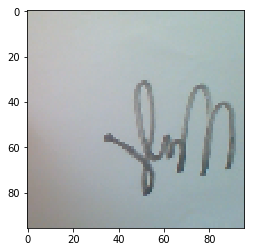

The type predicted is: MENSAH


In [87]:
type_1 = preprocessing.image.load_img('./data/test3.png',
                                      target_size=(width, height))
plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))



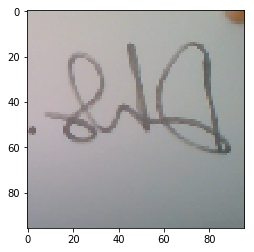

The type predicted is: VICTORIA


In [96]:
type_2 = preprocessing.image.load_img('./data/0.png',
                                      target_size=(width, height))
plt.imshow(type_2)
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

Finally test our model predictions live with our camera:

In [89]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize
    roi = cv2.resize(roi, (width, height))
    
    # predict!
    roi_X = np.expand_dims(roi, axis=0)

    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred, type_4_pred = predictions[0]

    # add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, tipe_2_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    
    # add text
    tipe_3_text = '{}: {}%'.format(class_names[2], int(type_3_pred*100))
    cv2.putText(frame, tipe_3_text, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_4_text = '{}: {}%'.format(class_names[3], int(type_4_pred*100))
    cv2.putText(frame, tipe_4_text, (70, 260), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # show the frame
    cv2.imshow("Test out", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)            

## Save your model for future use

You can now export and save your trained model. From now on, you won't need to re-train it. You can just load it and use it for predictions.

In [91]:
model.save('4peoplesignature.h5')